# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t120_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,139.747997,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
0,1124.0,1376.0,1773.0,1903.0,2185.0,2138.0,2431.0,2451.0,2791.0,2905.0,...,4693.0,4497.0,4673.0,4581.0,4712.0,4640.0,4653.0,4712.0,4689.0,4641.0
1,1011.0,1338.0,1633.0,1826.0,2104.0,2187.0,2397.0,2569.0,2737.0,3002.0,...,4701.0,4533.0,4657.0,4770.0,4588.0,4675.0,4587.0,4733.0,4659.0,4724.0
2,1086.0,1345.0,1630.0,1900.0,2084.0,2219.0,2471.0,2421.0,2798.0,2902.0,...,4628.0,4593.0,4610.0,4634.0,4704.0,4671.0,4599.0,4650.0,4423.0,4620.0
3,1136.0,1351.0,1599.0,1899.0,2060.0,2256.0,2355.0,2602.0,2869.0,3028.0,...,4679.0,4632.0,4750.0,4653.0,4598.0,4618.0,4634.0,4701.0,4724.0,4581.0
4,1083.0,1319.0,1584.0,1839.0,2031.0,2284.0,2336.0,2479.0,2782.0,2836.0,...,4526.0,4651.0,4649.0,4813.0,4725.0,4560.0,4502.0,4524.0,4299.0,4633.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,686.0,749.0,980.0,1041.0,1223.0,1235.0,1315.0,1396.0,1471.0,1540.0,...,1961.0,2067.0,2034.0,2062.0,2003.0,2101.0,1956.0,1980.0,2045.0,2160.0
1325,660.0,814.0,888.0,999.0,1151.0,1212.0,1320.0,1381.0,1567.0,1532.0,...,2093.0,1933.0,2046.0,1934.0,2109.0,2020.0,2035.0,1961.0,2031.0,2030.0
1326,598.0,674.0,929.0,1047.0,1197.0,1175.0,1244.0,1405.0,1495.0,1503.0,...,1968.0,2069.0,2030.0,1997.0,2020.0,1978.0,2013.0,2093.0,2056.0,2059.0
1327,587.0,664.0,899.0,1012.0,1078.0,1243.0,1202.0,1393.0,1450.0,1443.0,...,1842.0,2014.0,1966.0,2018.0,2024.0,2077.0,1915.0,1951.0,1886.0,1936.0


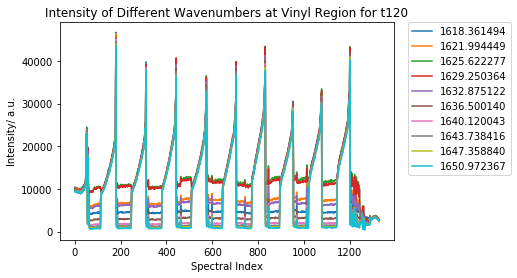

In [3]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t120')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [4]:
# df.loc[:,'1629.250364'] --> When using loc.
# df.columns.get_loc('1629.250364') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1629.250364'. Use relevant parameter for iloc and loc respectively.

# Filter Relevant Spectra

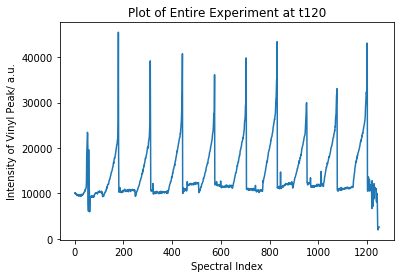

In [5]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:1250,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t120')
plt.show()

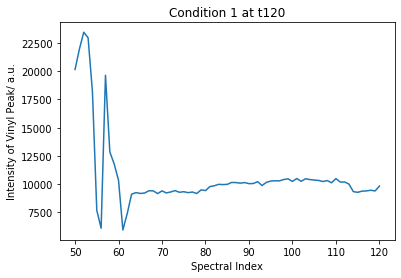

In [6]:
# Condition
df.loc[50:120,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 at t120')
plt.show()

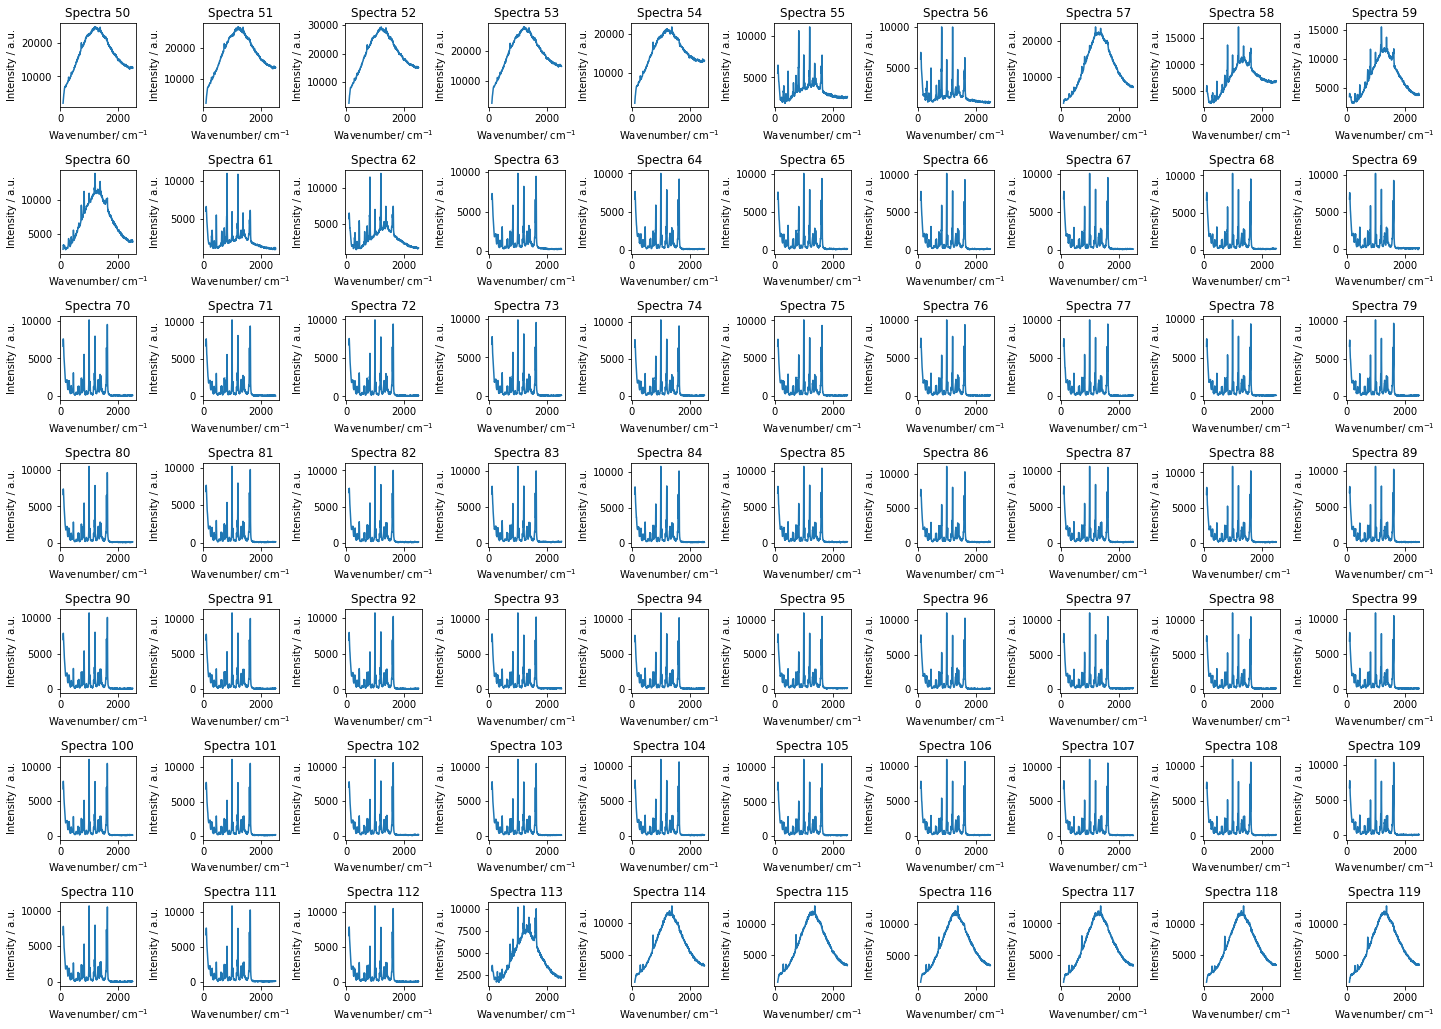

In [7]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(50, 120):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-49))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [8]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = df.loc[90:109, :]
condition1_ss.insert(loc = 0, column = 'Condition', value =10)
condition1_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
90,10,6957.0,7672.0,7840.0,7379.0,7045.0,6394.0,5834.0,5354.0,5224.0,...,90.0,106.0,124.0,127.0,127.0,138.0,41.0,95.0,113.0,136.0
91,10,7014.0,7655.0,7819.0,7602.0,6905.0,6467.0,5710.0,5440.0,5138.0,...,115.0,135.0,129.0,106.0,165.0,143.0,68.0,154.0,93.0,125.0
92,10,6887.0,7536.0,7987.0,7518.0,6879.0,6271.0,5653.0,5372.0,5158.0,...,116.0,96.0,139.0,130.0,144.0,110.0,120.0,141.0,87.0,147.0
93,10,6815.0,7769.0,7894.0,7616.0,7019.0,6368.0,5772.0,5392.0,5086.0,...,80.0,115.0,161.0,82.0,153.0,136.0,64.0,153.0,95.0,58.0
94,10,6809.0,7686.0,7617.0,7334.0,7055.0,6427.0,5680.0,5442.0,5028.0,...,136.0,118.0,132.0,125.0,134.0,193.0,70.0,159.0,87.0,150.0
95,10,6773.0,7588.0,7928.0,7669.0,6883.0,6399.0,5752.0,5443.0,4951.0,...,89.0,102.0,153.0,116.0,108.0,145.0,82.0,57.0,102.0,114.0
96,10,6887.0,7552.0,7879.0,7456.0,7188.0,6377.0,5871.0,5380.0,5115.0,...,118.0,63.0,122.0,153.0,118.0,167.0,88.0,87.0,80.0,132.0
97,10,6825.0,7670.0,8034.0,7552.0,6880.0,6467.0,6025.0,5418.0,5122.0,...,86.0,109.0,106.0,111.0,128.0,127.0,74.0,117.0,122.0,170.0
98,10,6964.0,7602.0,7691.0,7495.0,7018.0,6280.0,5872.0,5524.0,5273.0,...,165.0,70.0,186.0,138.0,191.0,90.0,109.0,81.0,97.0,137.0
99,10,6870.0,7736.0,8073.0,7419.0,7088.0,6434.0,5831.0,5506.0,5144.0,...,136.0,127.0,79.0,149.0,167.0,127.0,101.0,149.0,85.0,76.0


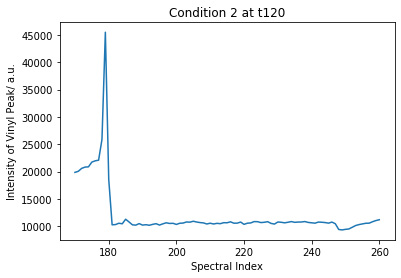

In [9]:
# Condition
df.loc[170:260,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 2 at t120')
plt.show()

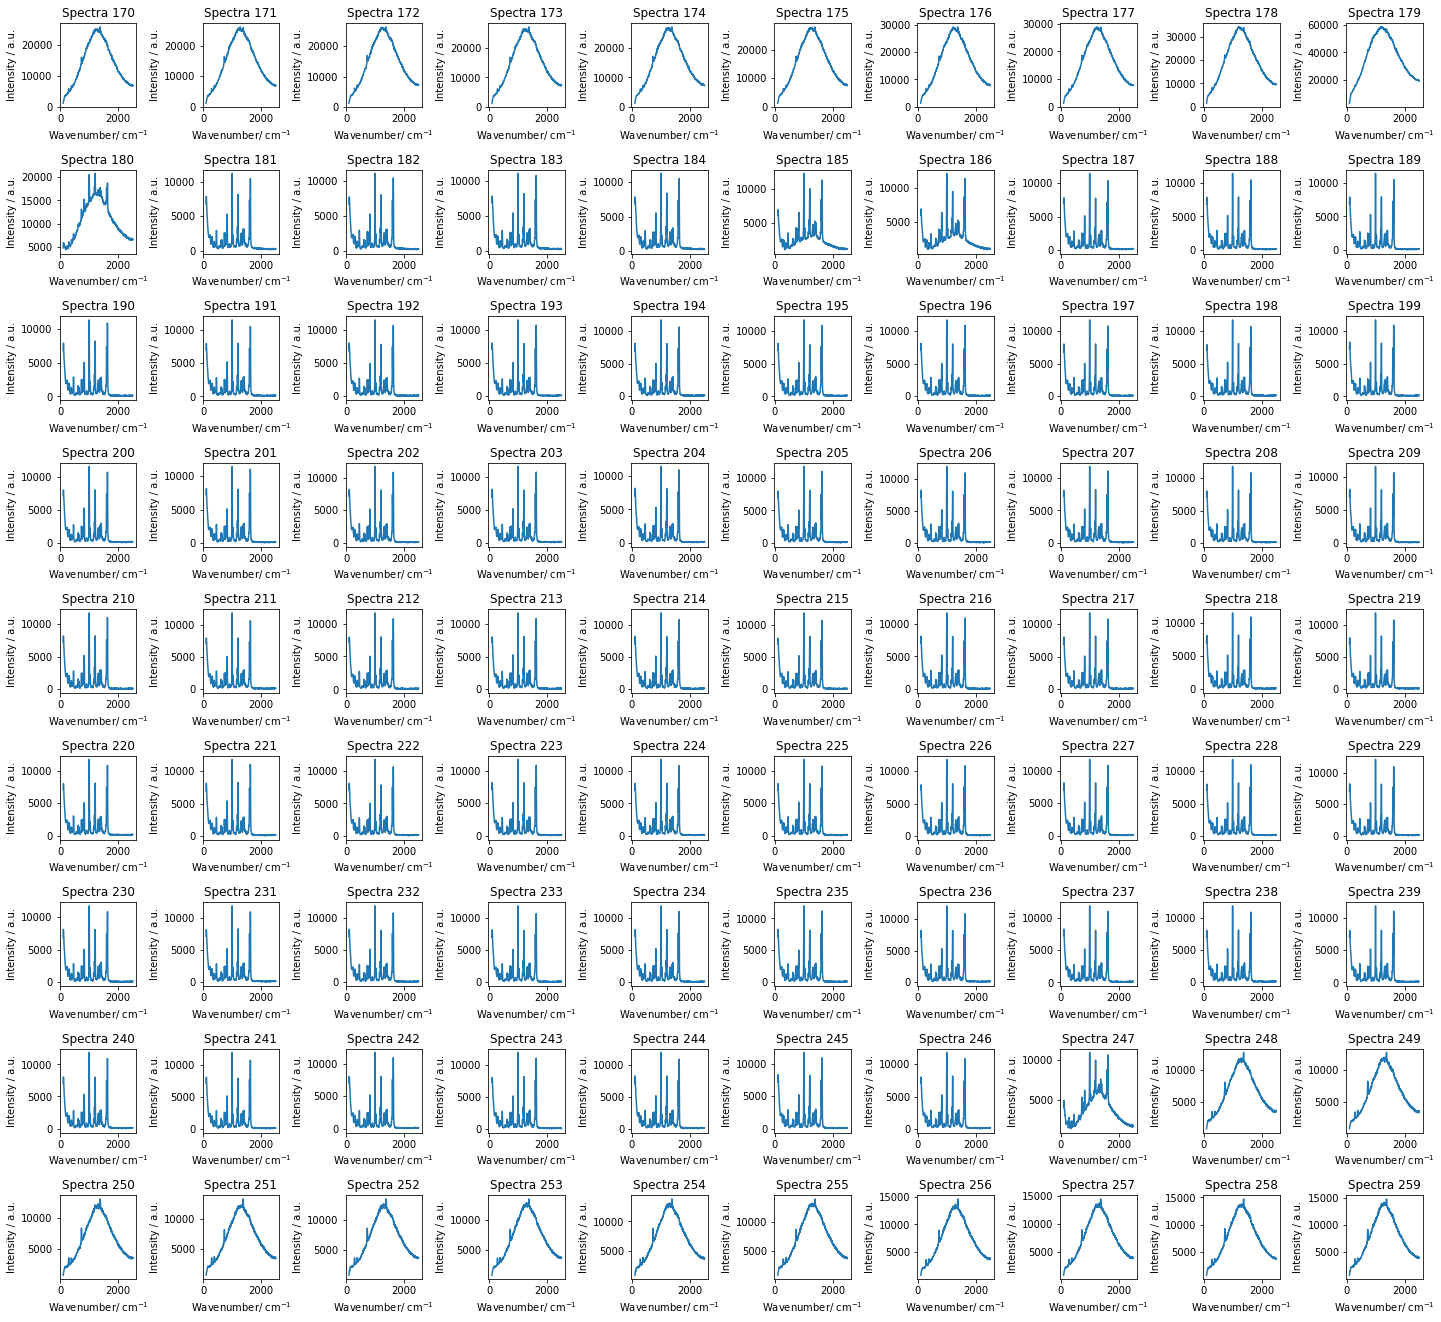

In [10]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(170, 260):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-169))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [11]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = df.loc[220:239, :]
condition2_ss.insert(loc = 0, column = 'Condition', value =11)
condition2_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
220,11,7109.0,7856.0,8045.0,7770.0,7162.0,6632.0,6081.0,5636.0,5324.0,...,149.0,138.0,154.0,122.0,153.0,90.0,129.0,107.0,110.0,150.0
221,11,6898.0,7944.0,8125.0,7745.0,7202.0,6355.0,5927.0,5595.0,5311.0,...,83.0,125.0,157.0,116.0,168.0,123.0,97.0,136.0,114.0,169.0
222,11,7106.0,7966.0,8128.0,7718.0,7178.0,6491.0,6088.0,5483.0,5250.0,...,74.0,136.0,155.0,110.0,123.0,125.0,95.0,127.0,137.0,141.0
223,11,7110.0,7897.0,8211.0,7668.0,7206.0,6594.0,6094.0,5623.0,5183.0,...,110.0,149.0,142.0,127.0,167.0,153.0,98.0,137.0,137.0,161.0
224,11,7027.0,7798.0,8084.0,7814.0,7331.0,6496.0,6065.0,5567.0,5239.0,...,113.0,121.0,154.0,166.0,158.0,193.0,96.0,154.0,114.0,137.0
225,11,7051.0,7920.0,8011.0,7618.0,7163.0,6599.0,6107.0,5725.0,5196.0,...,105.0,57.0,176.0,95.0,205.0,166.0,130.0,90.0,119.0,142.0
226,11,7163.0,7834.0,7893.0,7802.0,7407.0,6457.0,6117.0,5595.0,5181.0,...,114.0,142.0,152.0,118.0,94.0,132.0,97.0,151.0,129.0,105.0
227,11,7106.0,7978.0,8170.0,7730.0,7327.0,6569.0,5999.0,5666.0,5273.0,...,122.0,127.0,145.0,102.0,194.0,126.0,142.0,125.0,83.0,167.0
228,11,7104.0,7743.0,8008.0,7774.0,7157.0,6675.0,5942.0,5508.0,5282.0,...,90.0,92.0,175.0,97.0,165.0,136.0,188.0,75.0,112.0,139.0
229,11,7038.0,7836.0,8235.0,7675.0,7286.0,6553.0,6057.0,5536.0,5512.0,...,116.0,154.0,109.0,103.0,160.0,201.0,102.0,174.0,138.0,91.0


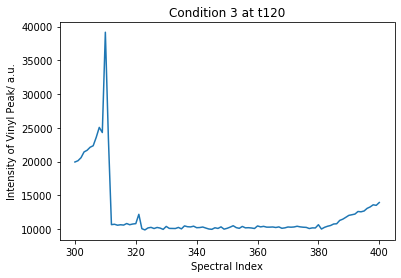

In [12]:
# Condition
df.loc[300:400,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 3 at t120')
plt.show()

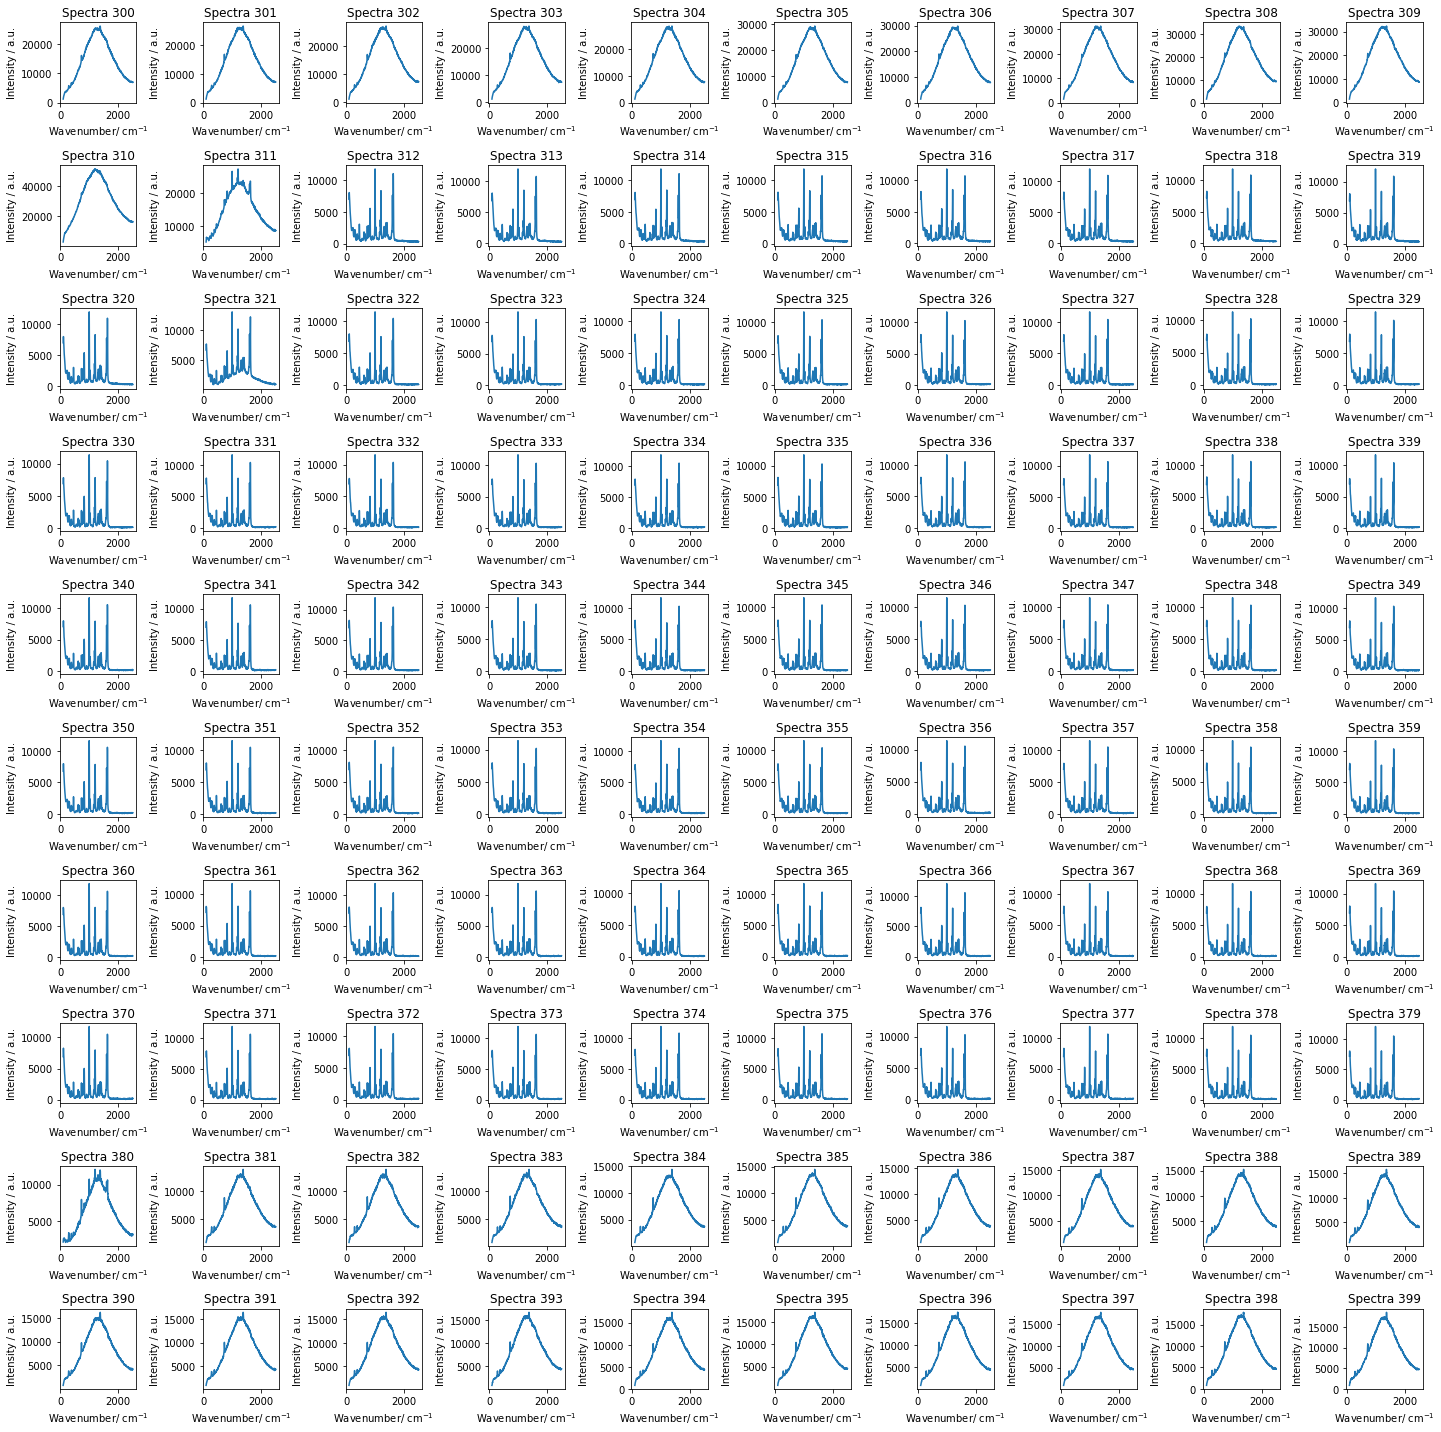

In [13]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(300, 400):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-299))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [14]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = df.loc[355:374, :]
condition3_ss.insert(loc = 0, column = 'Condition', value =12)
condition3_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
355,12,6896.0,7795.0,7862.0,7651.0,7207.0,6452.0,5975.0,5428.0,5149.0,...,92.0,131.0,122.0,135.0,159.0,158.0,120.0,191.0,88.0,169.0
356,12,6866.0,7786.0,8001.0,7416.0,7161.0,6532.0,5836.0,5430.0,5083.0,...,160.0,125.0,173.0,181.0,230.0,146.0,90.0,150.0,144.0,128.0
357,12,6957.0,7703.0,7877.0,7406.0,7042.0,6528.0,5991.0,5480.0,5168.0,...,87.0,129.0,140.0,105.0,166.0,127.0,94.0,88.0,78.0,142.0
358,12,6843.0,7785.0,7897.0,7569.0,7149.0,6592.0,5890.0,5478.0,5228.0,...,129.0,140.0,143.0,95.0,158.0,127.0,75.0,122.0,148.0,85.0
359,12,7062.0,7836.0,8001.0,7758.0,7299.0,6359.0,6082.0,5593.0,5243.0,...,119.0,85.0,155.0,129.0,139.0,138.0,65.0,148.0,132.0,125.0
360,12,6868.0,7975.0,7889.0,7746.0,7158.0,6519.0,6079.0,5400.0,5264.0,...,108.0,107.0,167.0,115.0,188.0,156.0,109.0,133.0,100.0,115.0
361,12,7118.0,8067.0,7992.0,7911.0,7206.0,6458.0,5951.0,5432.0,5139.0,...,105.0,83.0,139.0,137.0,153.0,167.0,147.0,74.0,142.0,142.0
362,12,7109.0,8090.0,8048.0,7678.0,7165.0,6490.0,6030.0,5712.0,5246.0,...,128.0,98.0,145.0,131.0,143.0,124.0,175.0,168.0,119.0,101.0
363,12,7146.0,7816.0,7920.0,7730.0,7184.0,6586.0,5776.0,5580.0,5101.0,...,136.0,163.0,164.0,169.0,167.0,183.0,107.0,99.0,94.0,146.0
364,12,7127.0,7963.0,7921.0,7608.0,7265.0,6577.0,6184.0,5437.0,5293.0,...,118.0,90.0,123.0,110.0,159.0,156.0,135.0,73.0,95.0,100.0


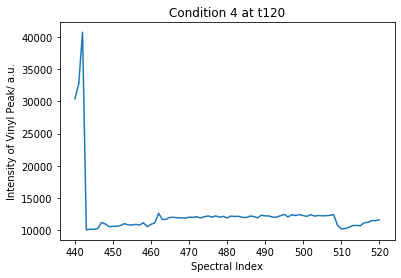

In [15]:
# Condition
df.loc[440:520,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 4 at t120')
plt.show()

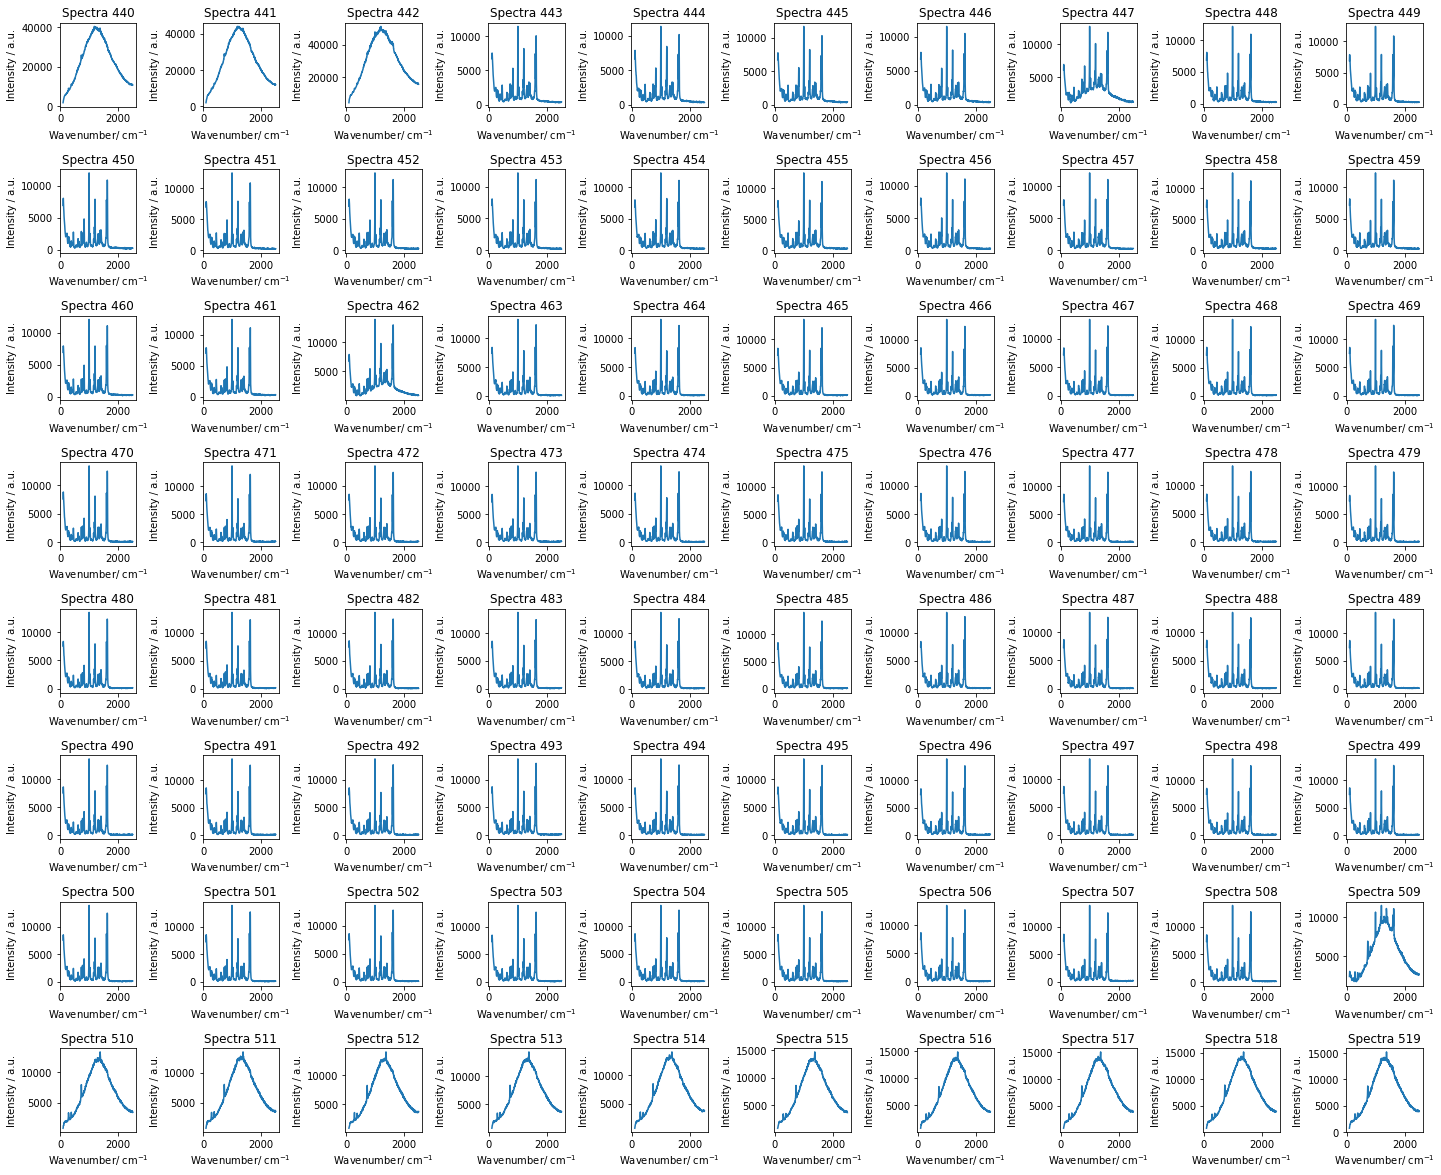

In [16]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(440, 520):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-439))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [17]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = df.loc[480:499, :]
condition4_ss.insert(loc = 0, column = 'Condition', value =13)
condition4_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
480,13,7566.0,8176.0,8374.0,8013.0,7472.0,6906.0,6219.0,5850.0,5713.0,...,97.0,131.0,109.0,140.0,174.0,176.0,103.0,92.0,117.0,140.0
481,13,7256.0,8189.0,8466.0,8130.0,7665.0,6966.0,6369.0,5824.0,5450.0,...,44.0,82.0,84.0,154.0,111.0,133.0,82.0,143.0,95.0,126.0
482,13,7494.0,8224.0,8584.0,8153.0,7667.0,6705.0,6202.0,5910.0,5524.0,...,157.0,118.0,118.0,114.0,141.0,121.0,63.0,141.0,167.0,108.0
483,13,7384.0,8301.0,8501.0,8419.0,7622.0,6927.0,6337.0,5904.0,5496.0,...,71.0,112.0,141.0,142.0,165.0,141.0,124.0,106.0,114.0,159.0
484,13,7407.0,8265.0,8523.0,8175.0,7644.0,6938.0,6377.0,5901.0,5512.0,...,125.0,124.0,104.0,124.0,138.0,135.0,73.0,125.0,133.0,155.0
485,13,7308.0,8331.0,8460.0,8221.0,7721.0,6938.0,6271.0,5883.0,5698.0,...,108.0,88.0,171.0,115.0,194.0,110.0,111.0,155.0,160.0,122.0
486,13,7485.0,8339.0,8411.0,8062.0,7523.0,7034.0,6379.0,5914.0,5583.0,...,73.0,142.0,163.0,107.0,150.0,125.0,83.0,130.0,123.0,133.0
487,13,7274.0,8248.0,8654.0,8175.0,7592.0,6932.0,6413.0,5816.0,5590.0,...,133.0,106.0,156.0,141.0,188.0,132.0,102.0,127.0,117.0,93.0
488,13,7379.0,8288.0,8596.0,8192.0,7581.0,7099.0,6306.0,5976.0,5564.0,...,126.0,120.0,145.0,127.0,139.0,159.0,136.0,159.0,115.0,163.0
489,13,7417.0,8391.0,8657.0,8231.0,7835.0,7090.0,6402.0,5865.0,5594.0,...,146.0,158.0,157.0,133.0,159.0,128.0,89.0,100.0,160.0,108.0


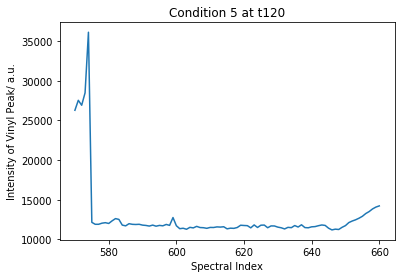

In [18]:
# Condition
df.loc[570:660,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 5 at t120')
plt.show()

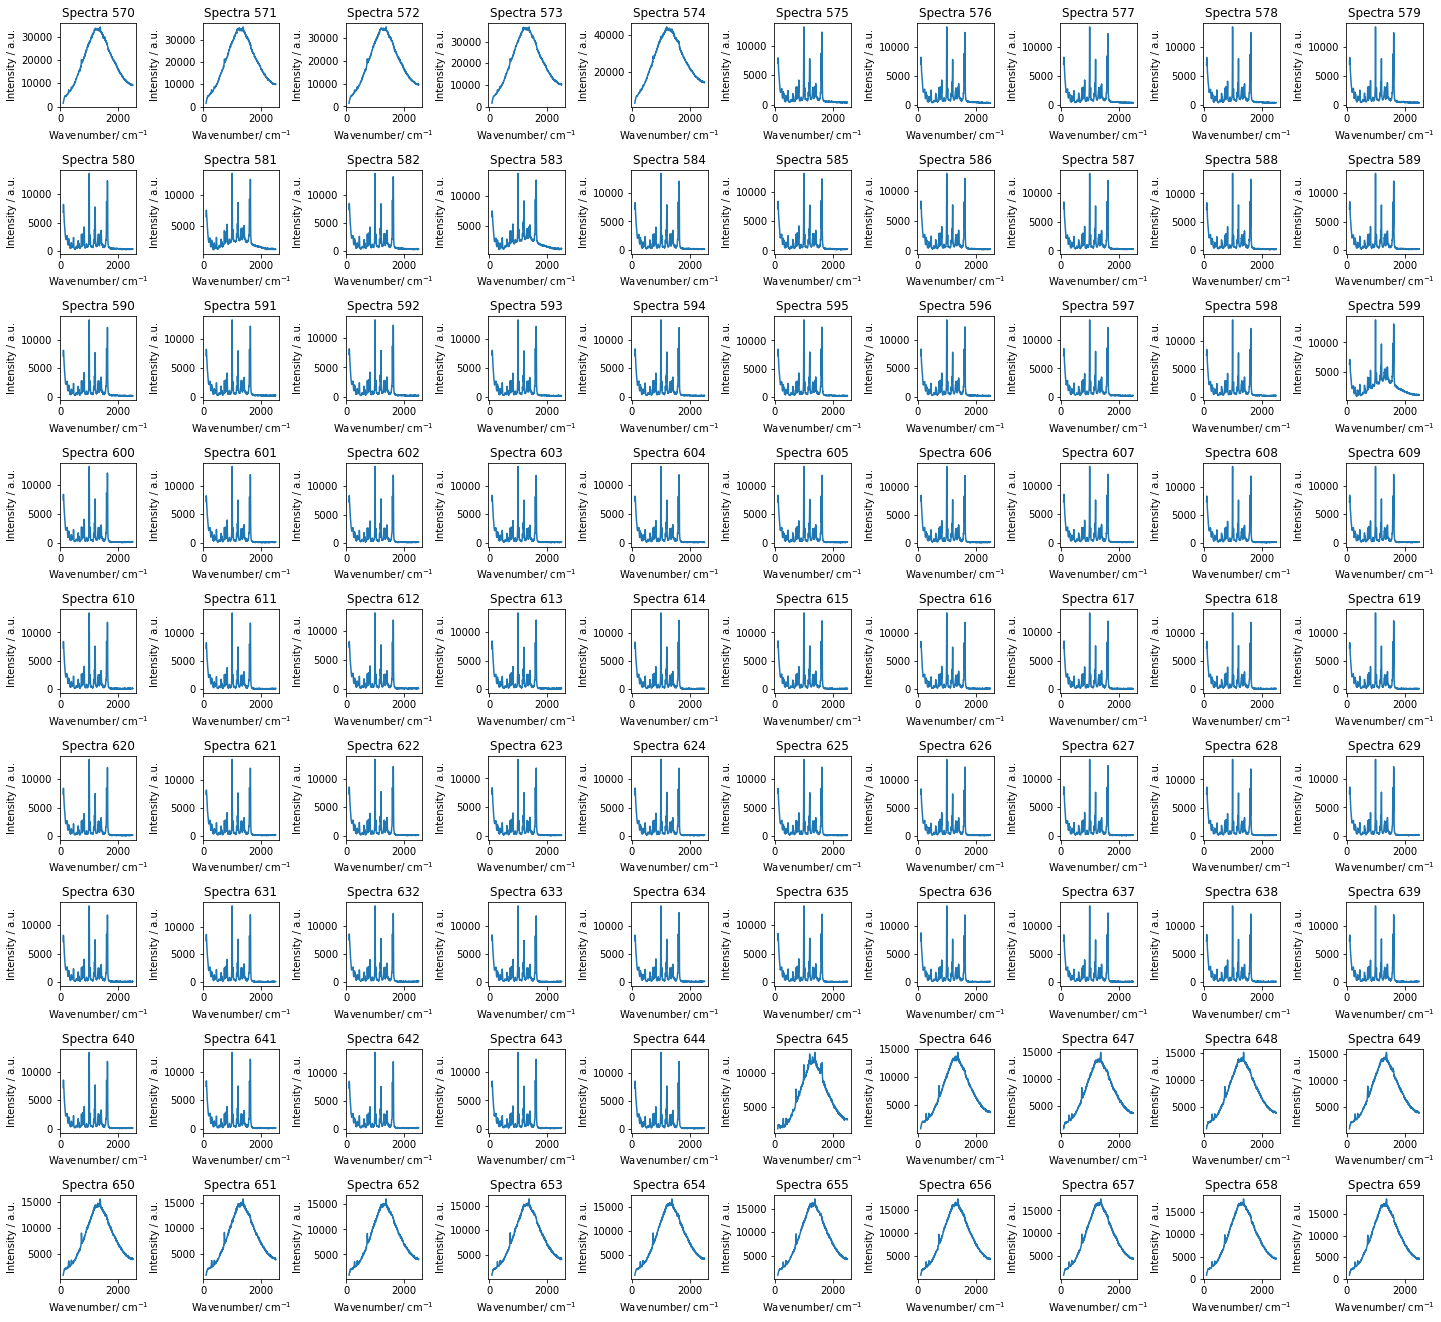

In [19]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(570, 660):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-569))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [20]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = df.loc[620:639, :]
condition5_ss.insert(loc = 0, column = 'Condition', value =14)
condition5_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
620,14,7359.0,8261.0,8420.0,8020.0,7552.0,6894.0,6228.0,5649.0,5381.0,...,127.0,100.0,168.0,148.0,136.0,139.0,71.0,84.0,131.0,127.0
621,14,7371.0,8119.0,8121.0,8101.0,7580.0,7014.0,6443.0,5772.0,5532.0,...,108.0,103.0,118.0,115.0,228.0,170.0,129.0,97.0,128.0,133.0
622,14,7320.0,8062.0,8522.0,8050.0,7693.0,6901.0,6356.0,5736.0,5498.0,...,110.0,118.0,137.0,115.0,156.0,168.0,88.0,114.0,116.0,143.0
623,14,7291.0,8105.0,8375.0,8051.0,7528.0,6873.0,6123.0,5791.0,5326.0,...,86.0,115.0,121.0,103.0,191.0,112.0,105.0,138.0,151.0,108.0
624,14,7267.0,8140.0,8450.0,8102.0,7420.0,6899.0,6304.0,5823.0,5439.0,...,107.0,116.0,144.0,121.0,124.0,178.0,78.0,135.0,110.0,156.0
625,14,7550.0,8132.0,8410.0,7996.0,7503.0,6890.0,6310.0,5837.0,5414.0,...,117.0,70.0,83.0,116.0,167.0,141.0,133.0,38.0,91.0,117.0
626,14,7433.0,8145.0,8387.0,8144.0,7430.0,6821.0,6279.0,5971.0,5491.0,...,88.0,143.0,132.0,170.0,107.0,109.0,123.0,115.0,62.0,120.0
627,14,7320.0,7976.0,8632.0,8275.0,7537.0,6986.0,6374.0,5927.0,5551.0,...,109.0,129.0,124.0,110.0,134.0,155.0,109.0,106.0,123.0,153.0
628,14,7422.0,8186.0,8635.0,8054.0,7440.0,6921.0,6259.0,5834.0,5617.0,...,111.0,85.0,148.0,150.0,114.0,168.0,91.0,107.0,67.0,105.0
629,14,7462.0,8351.0,8607.0,8118.0,7549.0,6840.0,6478.0,5929.0,5482.0,...,129.0,61.0,184.0,100.0,190.0,162.0,96.0,119.0,103.0,74.0


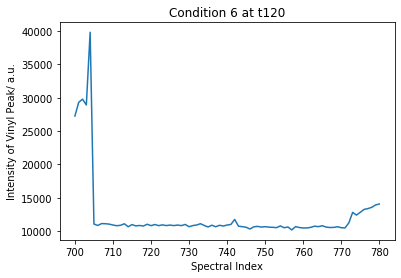

In [21]:
# Condition
df.loc[700:780,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 6 at t120')
plt.show()

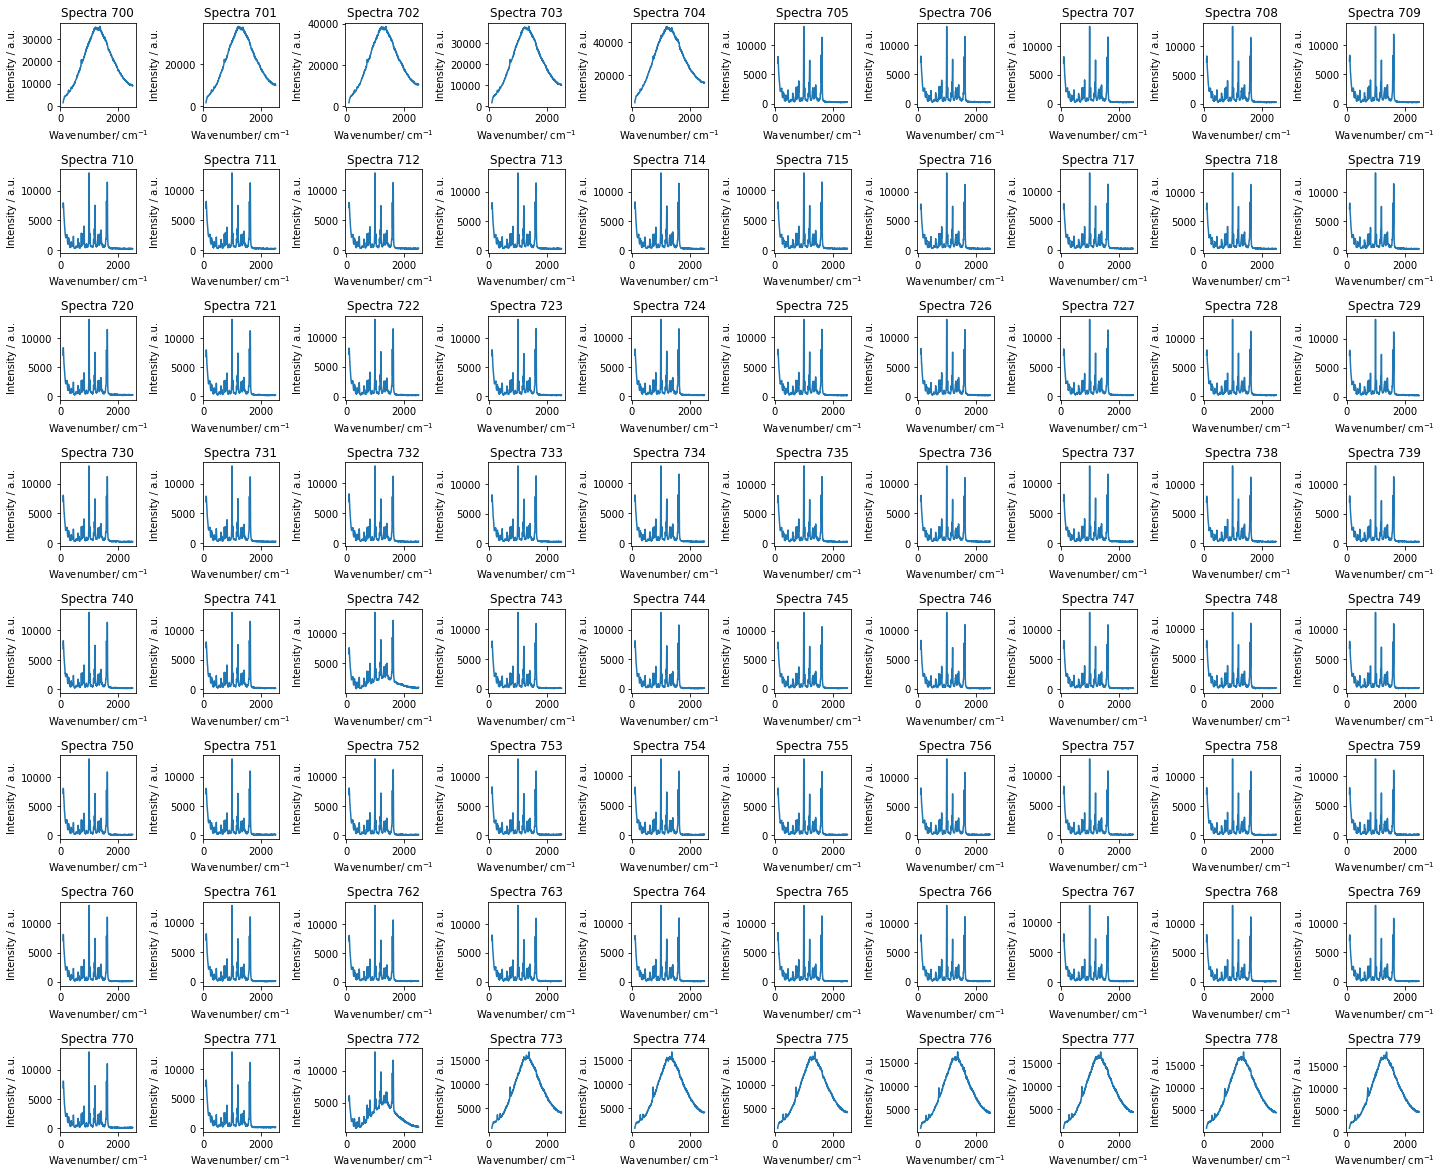

In [22]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(700, 780):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-699))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [23]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = df.loc[750:769, :]
condition6_ss.insert(loc = 0, column = 'Condition', value =15)
condition6_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
750,15,7221.0,7727.0,8076.0,7798.0,7282.0,6441.0,6066.0,5455.0,5441.0,...,117.0,118.0,124.0,150.0,184.0,111.0,110.0,141.0,151.0,158.0
751,15,7120.0,8029.0,7957.0,7730.0,7083.0,6405.0,5980.0,5526.0,5290.0,...,164.0,137.0,172.0,177.0,155.0,136.0,120.0,78.0,160.0,119.0
752,15,6955.0,7800.0,8069.0,7780.0,7295.0,6558.0,5939.0,5534.0,5303.0,...,143.0,90.0,135.0,147.0,164.0,129.0,98.0,153.0,88.0,135.0
753,15,7234.0,7842.0,8283.0,7852.0,7291.0,6512.0,6024.0,5667.0,5135.0,...,178.0,144.0,148.0,224.0,142.0,163.0,121.0,150.0,109.0,144.0
754,15,7015.0,7904.0,8104.0,7736.0,7325.0,6657.0,6108.0,5592.0,5228.0,...,150.0,125.0,131.0,108.0,145.0,195.0,91.0,142.0,108.0,126.0
755,15,6960.0,7805.0,8053.0,7853.0,7212.0,6659.0,6067.0,5542.0,5333.0,...,80.0,90.0,114.0,115.0,149.0,137.0,46.0,114.0,106.0,123.0
756,15,7184.0,8237.0,8160.0,7990.0,7258.0,6620.0,6151.0,5670.0,5350.0,...,167.0,77.0,161.0,137.0,101.0,77.0,73.0,82.0,90.0,103.0
757,15,7034.0,7847.0,8237.0,7706.0,7053.0,6528.0,5805.0,5548.0,5216.0,...,69.0,149.0,118.0,139.0,159.0,118.0,70.0,99.0,94.0,127.0
758,15,7077.0,8082.0,8139.0,7608.0,7127.0,6618.0,6095.0,5521.0,5314.0,...,74.0,121.0,84.0,103.0,117.0,149.0,68.0,148.0,89.0,108.0
759,15,6977.0,7932.0,8044.0,7617.0,7235.0,6543.0,5948.0,5613.0,5184.0,...,144.0,89.0,179.0,119.0,191.0,110.0,154.0,72.0,148.0,101.0


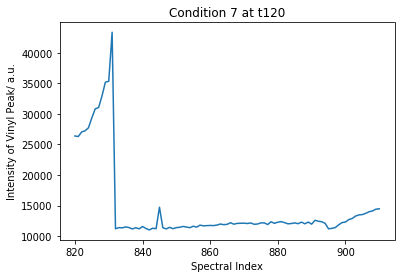

In [24]:
# Condition
df.loc[820:910,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 7 at t120')
plt.show()

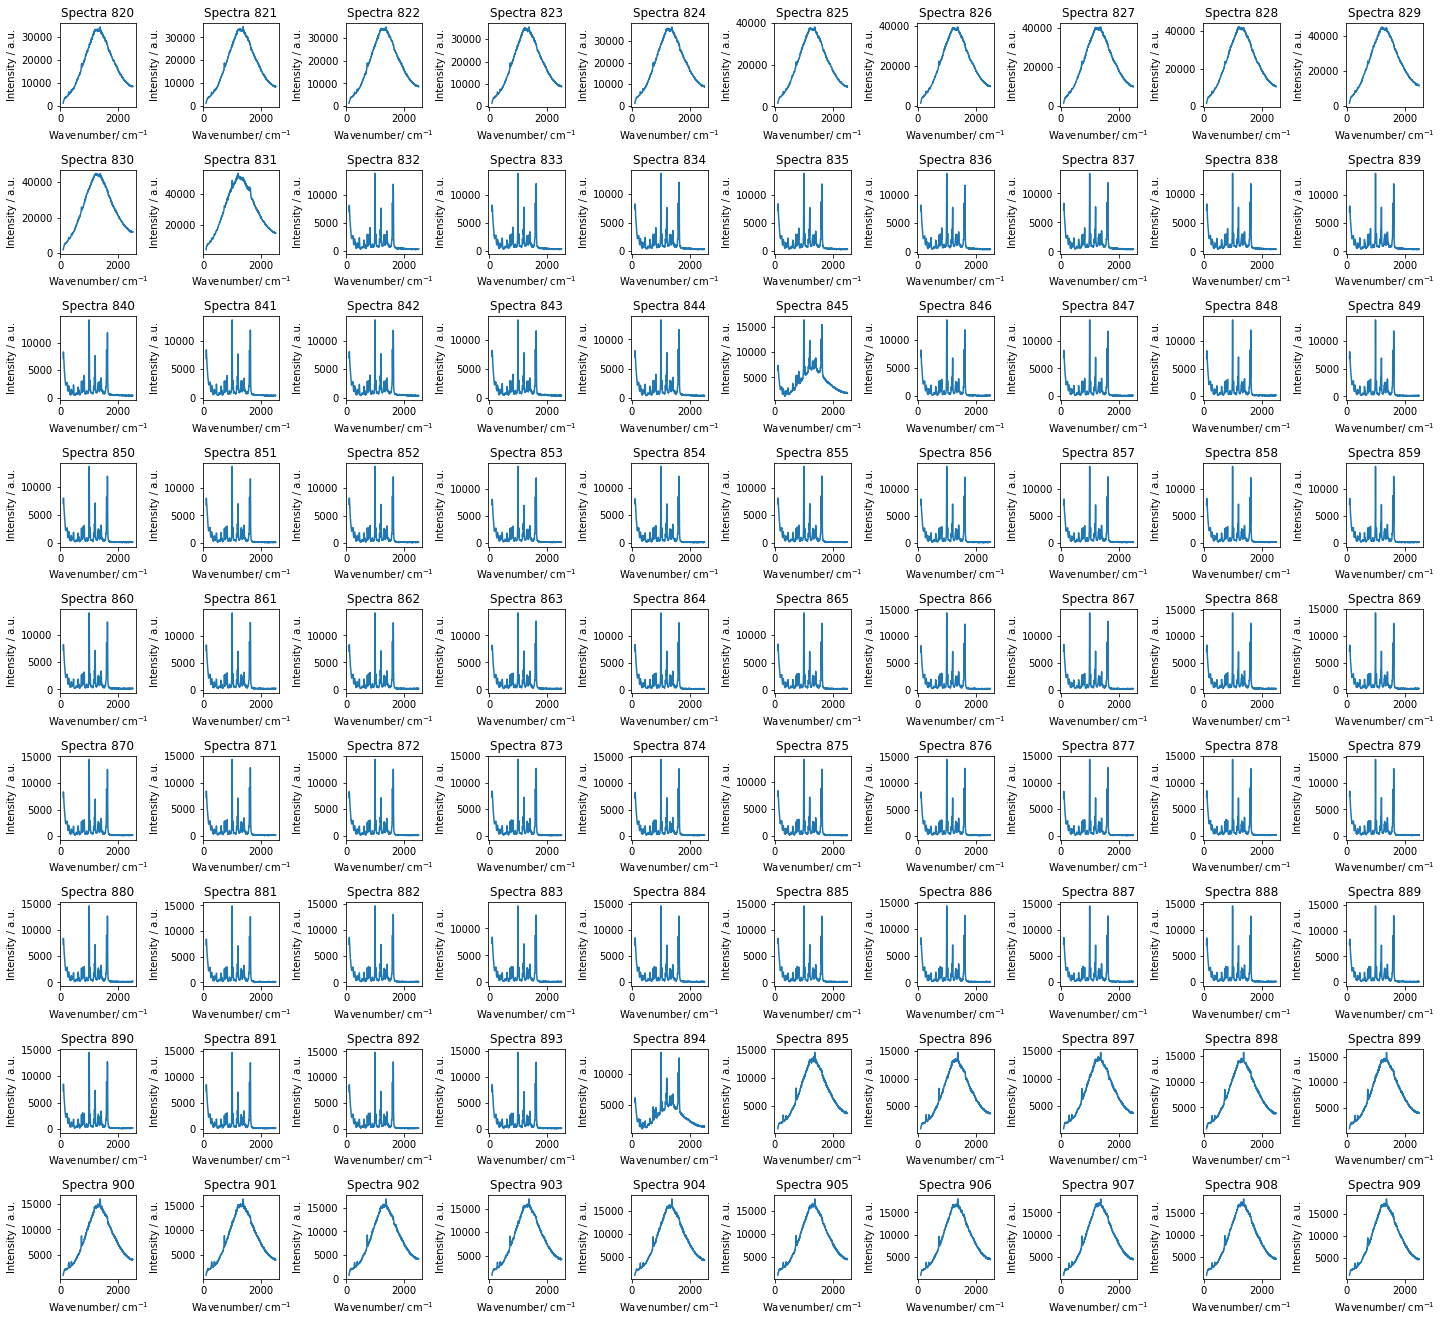

In [25]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(820, 910):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-819))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [26]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = df.loc[860:879, :]
condition7_ss.insert(loc = 0, column = 'Condition', value =16)
condition7_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
860,16,7193.0,8092.0,8190.0,8048.0,7409.0,6848.0,6318.0,5687.0,5290.0,...,207.0,187.0,172.0,190.0,246.0,228.0,147.0,163.0,136.0,153.0
861,16,7257.0,8012.0,8305.0,8018.0,7541.0,6758.0,6247.0,5844.0,5296.0,...,168.0,185.0,159.0,200.0,212.0,201.0,102.0,153.0,135.0,213.0
862,16,7082.0,8156.0,8284.0,7994.0,7519.0,6739.0,6194.0,5949.0,5463.0,...,154.0,153.0,191.0,126.0,252.0,154.0,123.0,152.0,133.0,146.0
863,16,7358.0,8184.0,8065.0,8053.0,7478.0,6756.0,6233.0,5780.0,5376.0,...,193.0,126.0,119.0,156.0,223.0,158.0,110.0,125.0,163.0,181.0
864,16,7166.0,7912.0,8320.0,7953.0,7369.0,6832.0,6386.0,5770.0,5404.0,...,211.0,111.0,121.0,123.0,178.0,220.0,203.0,155.0,121.0,139.0
865,16,7263.0,7914.0,8402.0,8036.0,7414.0,6749.0,6359.0,5907.0,5634.0,...,132.0,143.0,204.0,127.0,179.0,153.0,114.0,181.0,123.0,156.0
866,16,7081.0,8182.0,8230.0,7949.0,7487.0,6857.0,6249.0,5698.0,5467.0,...,120.0,109.0,206.0,92.0,171.0,187.0,125.0,148.0,164.0,168.0
867,16,7141.0,8066.0,8332.0,8139.0,7478.0,6709.0,6147.0,5901.0,5506.0,...,189.0,245.0,203.0,140.0,159.0,193.0,169.0,156.0,142.0,188.0
868,16,7128.0,8136.0,8331.0,7964.0,7548.0,6700.0,6385.0,5932.0,5343.0,...,171.0,171.0,174.0,132.0,160.0,149.0,106.0,174.0,114.0,135.0
869,16,7198.0,8071.0,8285.0,8037.0,7468.0,6969.0,6412.0,5697.0,5561.0,...,143.0,116.0,150.0,132.0,139.0,192.0,116.0,106.0,90.0,178.0


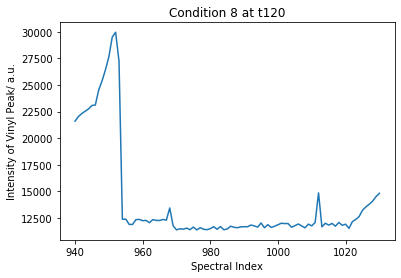

In [27]:
# Condition
df.loc[940:1030,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 8 at t120')
plt.show()

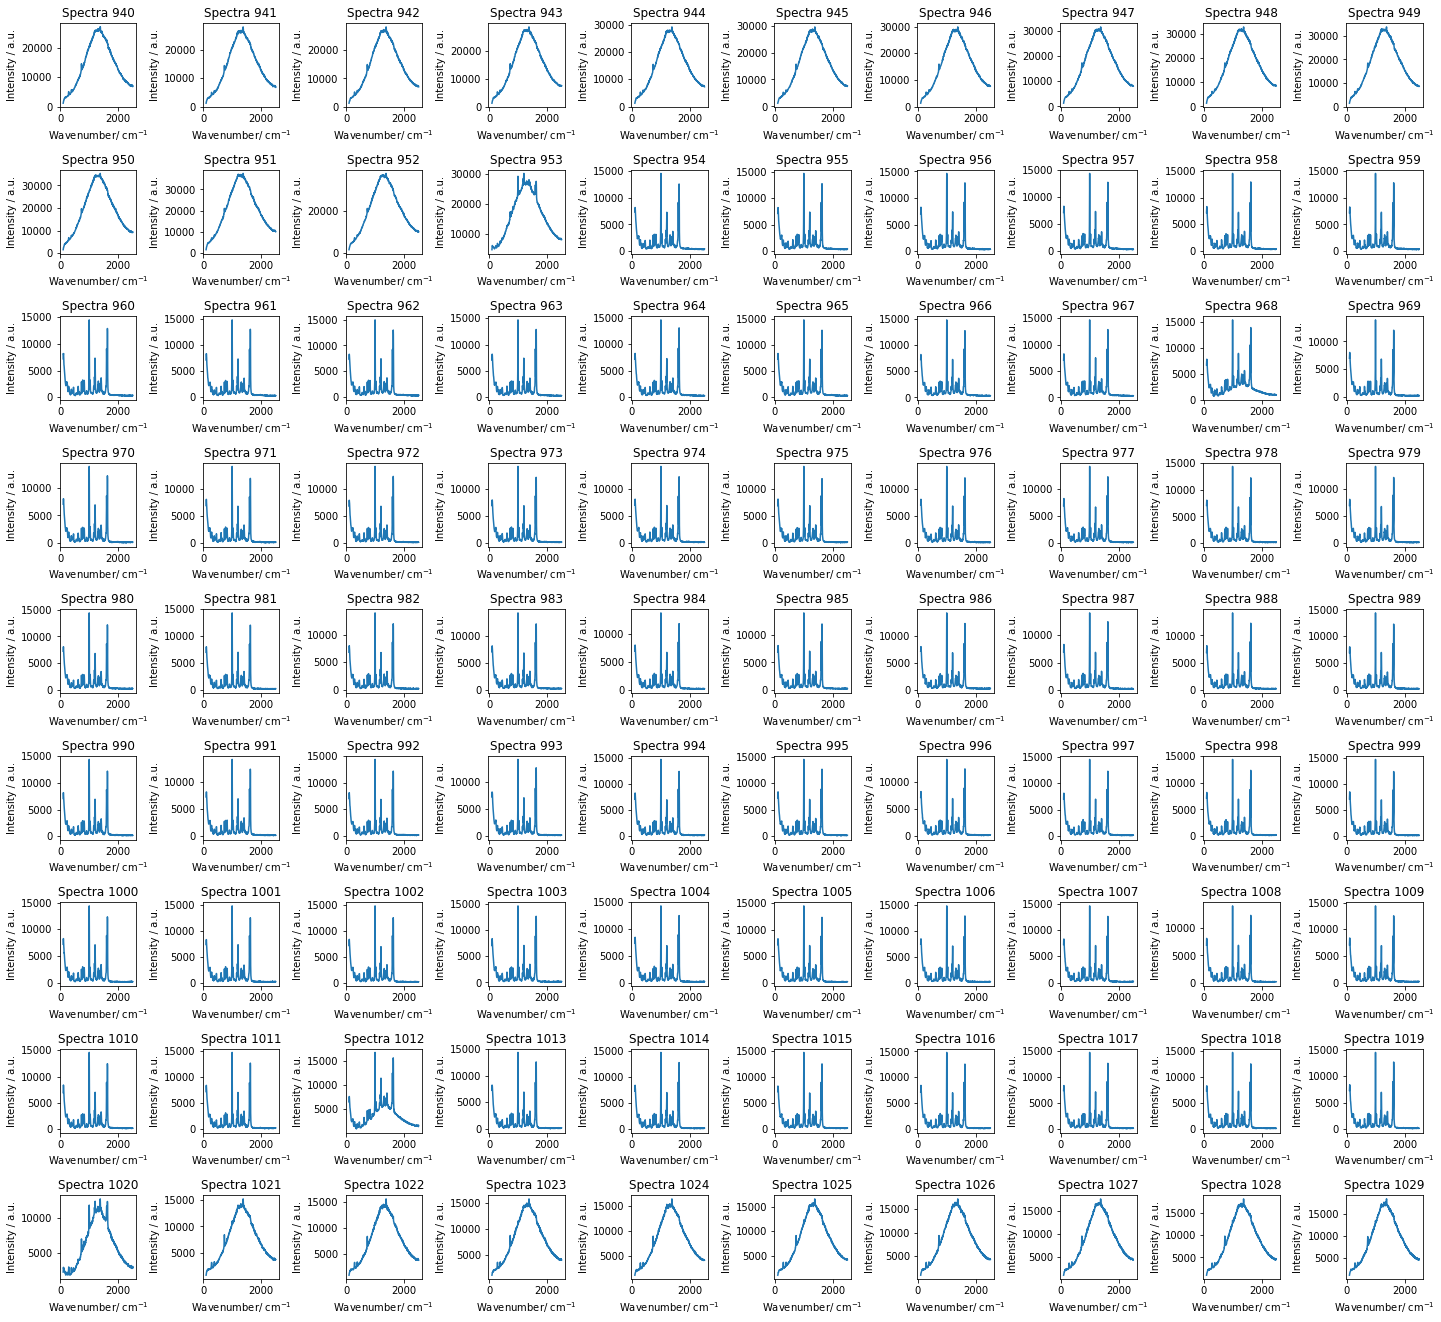

In [28]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(940, 1030):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-939))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [29]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = df.loc[980:999, :]
condition8_ss.insert(loc = 0, column = 'Condition', value =17)
condition8_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
980,17,7221.0,7863.0,8069.0,7669.0,7144.0,6659.0,6143.0,5592.0,5400.0,...,140.0,205.0,199.0,235.0,216.0,248.0,188.0,182.0,178.0,204.0
981,17,6984.0,7859.0,8017.0,7726.0,7235.0,6480.0,6084.0,5671.0,5425.0,...,194.0,231.0,237.0,233.0,235.0,232.0,158.0,205.0,196.0,212.0
982,17,6802.0,7814.0,7985.0,7740.0,7298.0,6466.0,5959.0,5488.0,5150.0,...,200.0,195.0,282.0,187.0,214.0,226.0,217.0,233.0,170.0,193.0
983,17,7024.0,7857.0,8128.0,7794.0,7322.0,6579.0,6203.0,5738.0,5133.0,...,206.0,220.0,186.0,208.0,218.0,230.0,162.0,204.0,219.0,203.0
984,17,6972.0,7830.0,8058.0,7741.0,7123.0,6537.0,6164.0,5661.0,5379.0,...,192.0,200.0,174.0,183.0,216.0,239.0,130.0,174.0,199.0,195.0
985,17,6922.0,7621.0,8099.0,7888.0,7234.0,6692.0,5964.0,5687.0,5456.0,...,190.0,197.0,201.0,192.0,232.0,241.0,130.0,207.0,235.0,192.0
986,17,7122.0,7834.0,7983.0,7714.0,7388.0,6758.0,6141.0,5579.0,5239.0,...,164.0,181.0,160.0,237.0,173.0,239.0,130.0,129.0,183.0,215.0
987,17,6967.0,8002.0,8327.0,7838.0,7386.0,6595.0,6112.0,5806.0,5332.0,...,180.0,217.0,239.0,188.0,209.0,197.0,217.0,151.0,174.0,141.0
988,17,6854.0,7915.0,8113.0,7844.0,7202.0,6661.0,6143.0,5523.0,5378.0,...,185.0,169.0,254.0,184.0,188.0,247.0,191.0,175.0,166.0,172.0
989,17,6946.0,7899.0,8038.0,7818.0,7223.0,6667.0,5978.0,5849.0,5431.0,...,235.0,212.0,221.0,218.0,217.0,198.0,158.0,167.0,201.0,185.0


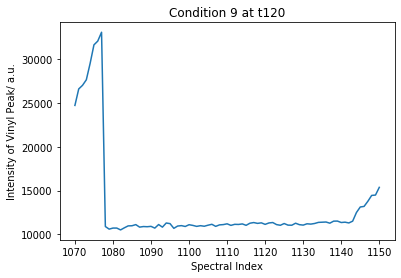

In [30]:
# Condition
df.loc[1070:1150,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 9 at t120')
plt.show()

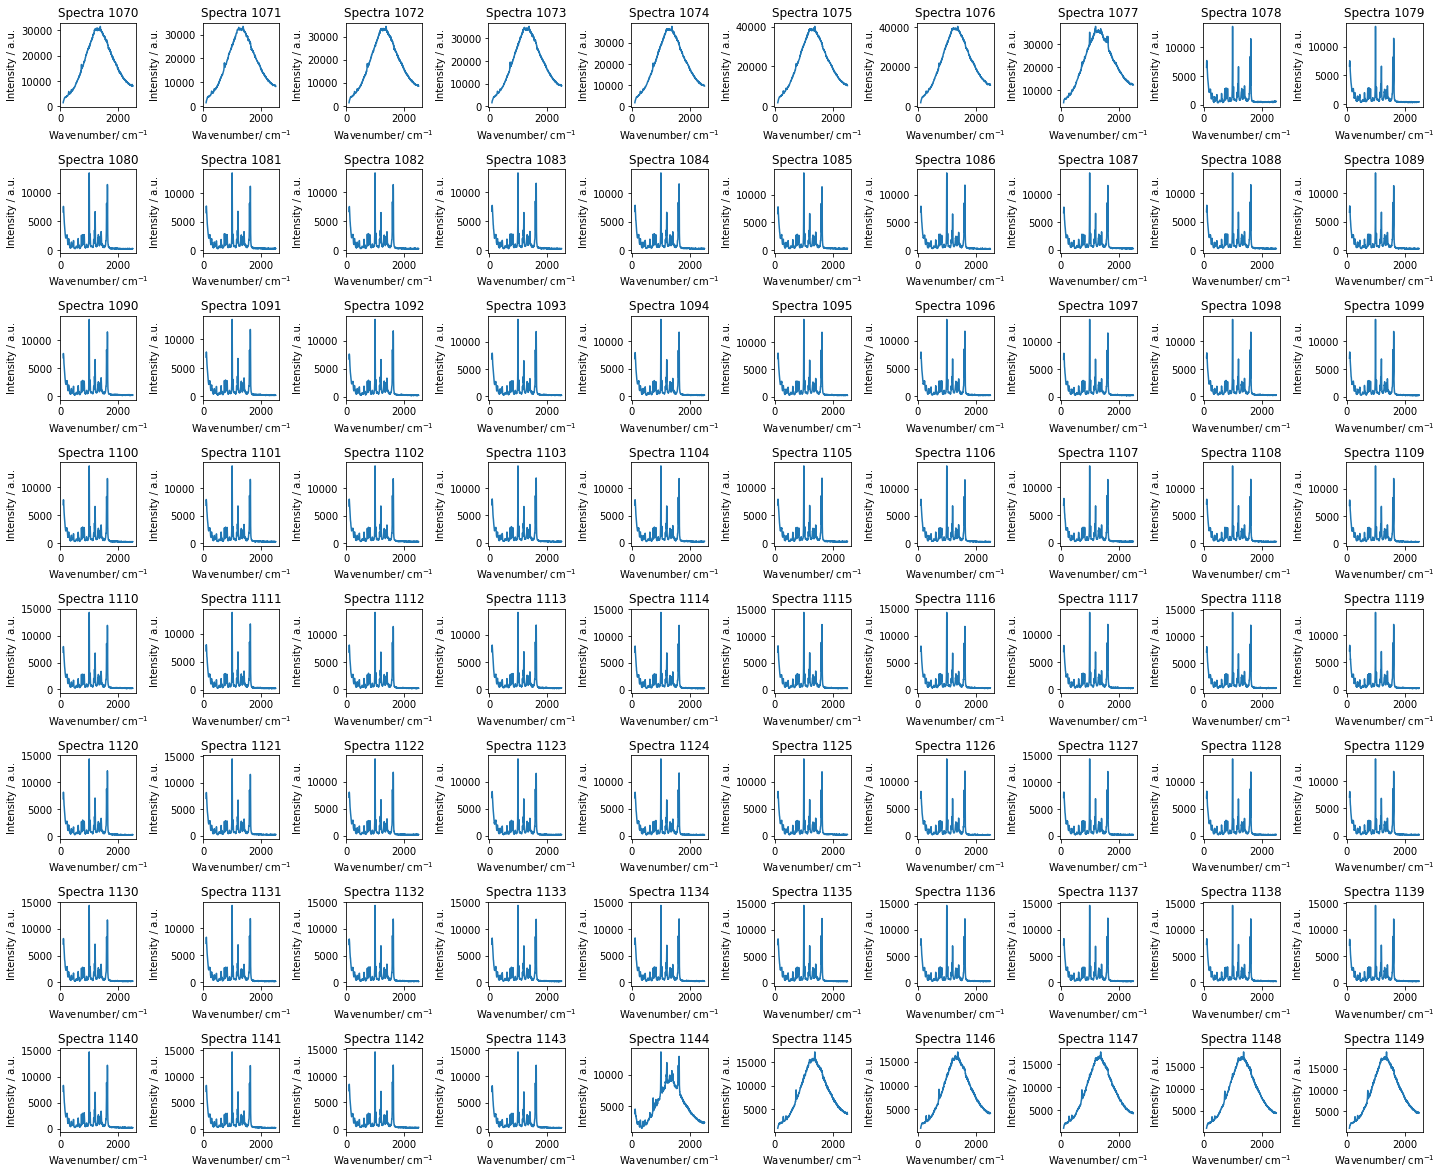

In [31]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(1070, 1150):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-1069))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [32]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = df.loc[1120:1139, :]
condition9_ss.insert(loc = 0, column = 'Condition', value =18)
condition9_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
1120,18,6934.0,7968.0,8154.0,7850.0,7358.0,6653.0,6065.0,5676.0,5462.0,...,212.0,206.0,316.0,261.0,267.0,226.0,216.0,246.0,197.0,257.0
1121,18,7083.0,7935.0,8176.0,7869.0,7436.0,6728.0,6201.0,5747.0,5254.0,...,217.0,205.0,175.0,251.0,248.0,273.0,191.0,222.0,162.0,246.0
1122,18,7126.0,7968.0,8081.0,7899.0,7275.0,6806.0,6242.0,5694.0,5295.0,...,175.0,116.0,234.0,115.0,212.0,138.0,134.0,153.0,161.0,186.0
1123,18,7084.0,7902.0,8204.0,7816.0,7474.0,6756.0,6152.0,5746.0,5397.0,...,178.0,190.0,238.0,222.0,207.0,234.0,167.0,164.0,157.0,182.0
1124,18,7036.0,7765.0,8063.0,7787.0,7264.0,6870.0,6062.0,5738.0,5397.0,...,151.0,177.0,217.0,146.0,240.0,243.0,157.0,140.0,179.0,153.0
1125,18,7080.0,7956.0,8224.0,7683.0,7300.0,6718.0,6204.0,5595.0,5307.0,...,171.0,184.0,196.0,194.0,206.0,232.0,185.0,160.0,167.0,185.0
1126,18,6933.0,7908.0,8178.0,7830.0,7205.0,6637.0,6052.0,5704.0,5471.0,...,155.0,234.0,206.0,208.0,170.0,178.0,188.0,185.0,179.0,191.0
1127,18,7136.0,8082.0,8128.0,7681.0,7395.0,6424.0,6105.0,5585.0,5292.0,...,143.0,203.0,193.0,243.0,228.0,224.0,174.0,251.0,148.0,210.0
1128,18,7039.0,7866.0,8243.0,7957.0,7270.0,6505.0,6133.0,5562.0,5281.0,...,161.0,193.0,268.0,197.0,208.0,189.0,171.0,191.0,152.0,250.0
1129,18,7089.0,7789.0,8109.0,7732.0,7299.0,6633.0,5984.0,5657.0,5474.0,...,207.0,177.0,250.0,196.0,239.0,246.0,165.0,231.0,136.0,225.0


In [33]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
90,10,6957.0,7672.0,7840.0,7379.0,7045.0,6394.0,5834.0,5354.0,5224.0,...,90.0,106.0,124.0,127.0,127.0,138.0,41.0,95.0,113.0,136.0
91,10,7014.0,7655.0,7819.0,7602.0,6905.0,6467.0,5710.0,5440.0,5138.0,...,115.0,135.0,129.0,106.0,165.0,143.0,68.0,154.0,93.0,125.0
92,10,6887.0,7536.0,7987.0,7518.0,6879.0,6271.0,5653.0,5372.0,5158.0,...,116.0,96.0,139.0,130.0,144.0,110.0,120.0,141.0,87.0,147.0
93,10,6815.0,7769.0,7894.0,7616.0,7019.0,6368.0,5772.0,5392.0,5086.0,...,80.0,115.0,161.0,82.0,153.0,136.0,64.0,153.0,95.0,58.0
94,10,6809.0,7686.0,7617.0,7334.0,7055.0,6427.0,5680.0,5442.0,5028.0,...,136.0,118.0,132.0,125.0,134.0,193.0,70.0,159.0,87.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,18,7182.0,7846.0,8240.0,8142.0,7565.0,6802.0,6197.0,5784.0,5455.0,...,229.0,157.0,256.0,217.0,279.0,185.0,204.0,241.0,282.0,214.0
1136,18,7186.0,7979.0,8326.0,8003.0,7399.0,6808.0,6374.0,5800.0,5392.0,...,225.0,242.0,269.0,210.0,235.0,245.0,260.0,221.0,238.0,234.0
1137,18,7147.0,8069.0,8289.0,7901.0,7471.0,6796.0,6307.0,5730.0,5361.0,...,264.0,224.0,238.0,266.0,289.0,243.0,207.0,186.0,224.0,257.0
1138,18,7200.0,7986.0,8261.0,8050.0,7459.0,6856.0,6303.0,5771.0,5421.0,...,273.0,281.0,278.0,186.0,283.0,263.0,169.0,201.0,171.0,167.0


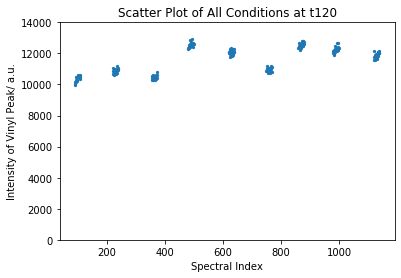

In [34]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t120')
plt.ylim(0, 14000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [35]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [36]:
# Inspect df_.
df_

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
90,10,6957.0,7672.0,7840.0,7379.0,7045.0,6394.0,5834.0,5354.0,5224.0,...,90.0,106.0,124.0,127.0,127.0,138.0,41.0,95.0,113.0,136.0
91,10,7014.0,7655.0,7819.0,7602.0,6905.0,6467.0,5710.0,5440.0,5138.0,...,115.0,135.0,129.0,106.0,165.0,143.0,68.0,154.0,93.0,125.0
92,10,6887.0,7536.0,7987.0,7518.0,6879.0,6271.0,5653.0,5372.0,5158.0,...,116.0,96.0,139.0,130.0,144.0,110.0,120.0,141.0,87.0,147.0
93,10,6815.0,7769.0,7894.0,7616.0,7019.0,6368.0,5772.0,5392.0,5086.0,...,80.0,115.0,161.0,82.0,153.0,136.0,64.0,153.0,95.0,58.0
94,10,6809.0,7686.0,7617.0,7334.0,7055.0,6427.0,5680.0,5442.0,5028.0,...,136.0,118.0,132.0,125.0,134.0,193.0,70.0,159.0,87.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,18,7182.0,7846.0,8240.0,8142.0,7565.0,6802.0,6197.0,5784.0,5455.0,...,229.0,157.0,256.0,217.0,279.0,185.0,204.0,241.0,282.0,214.0
1136,18,7186.0,7979.0,8326.0,8003.0,7399.0,6808.0,6374.0,5800.0,5392.0,...,225.0,242.0,269.0,210.0,235.0,245.0,260.0,221.0,238.0,234.0
1137,18,7147.0,8069.0,8289.0,7901.0,7471.0,6796.0,6307.0,5730.0,5361.0,...,264.0,224.0,238.0,266.0,289.0,243.0,207.0,186.0,224.0,257.0
1138,18,7200.0,7986.0,8261.0,8050.0,7459.0,6856.0,6303.0,5771.0,5421.0,...,273.0,281.0,278.0,186.0,283.0,263.0,169.0,201.0,171.0,167.0


In [37]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.250364']].groupby('Condition').describe()

1629.250364                                                    \
                count      mean         std      min       25%      50%   
Condition                                                                 
10               20.0  10269.65  158.827704   9878.0  10210.00  10284.5   
11               20.0  10715.70  146.008327  10370.0  10643.25  10749.0   
12               20.0  10264.10  101.554704  10069.0  10182.50  10282.0   
13               20.0  12145.10  164.048420  11882.0  12001.50  12155.0   
14               20.0  11597.55  157.114264  11308.0  11466.75  11542.5   
15               20.0  10602.00  135.373557  10195.0  10546.25  10597.5   
16               20.0  12005.00  160.746613  11714.0  11909.00  12012.5   
17               20.0  11668.90  151.128353  11402.0  11591.75  11678.0   
18               20.0  11250.45  150.325078  11048.0  11123.00  11249.5   

                              
                75%      max  
Condition                     
10         10377.25  10501.0  
11         10814.25  10880.0  
12         10309.50  10450.0  
13         12239.75  12434.0  
14         11737.75  11833.0  
15         10680.00  10826.0  
16         12115.50  12337.0  
17         11733.75  12039.0  
18         11364.25  11527.0

In [38]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201020 High Throughput Experiment Conditions 10 to 18\Online Raman\df_t120.csv')